Training Set:
Accuracy: 0.3125
Precision: 0.2000
Recall: 0.1250
F1 Score: 0.1538

Testing Set:
Accuracy: 0.2500
Precision: 0.3333
Recall: 0.5000
F1 Score: 0.4000


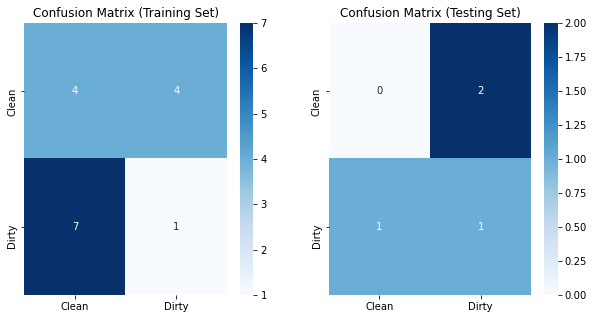

In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(data_dir):
    clean_images = []
    dirty_images = []
    labels = []

    for label in ["clean", "dirty"]:
        label_path = os.path.join(data_dir, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, (64, 64))  # Resize
            if label == "clean":
                clean_images.append(img)
                labels.append(0)  
            elif label == "dirty":
                dirty_images.append(img)
                labels.append(1)  

    return np.array(clean_images), np.array(dirty_images), np.array(labels)

def preprocess_images(images):
    preprocessed_images = []

    for img in images:
        # Applying preprocessing techniques
        img = img / 255.0
        preprocessed_images.append(img)

    return np.array(preprocessed_images)

def extract_features(images):
    # Extract features using simple statistics
    features = []
    for img in images:
        mean = np.mean(img)
        std_dev = np.std(img)
        features.append([mean, std_dev])

    return np.array(features)

def train_model(features, labels):
    threshold = 0.5
    predictions = np.where(features[:, 0] > threshold, 1, 0)
    
    return predictions

def evaluate_model(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

if __name__ == "__main__":
    data_dir = "val"  # path of daataset

    # Load dataset
    clean_images, dirty_images, labels = load_dataset(data_dir)

    # Preprocess images
    clean_images = preprocess_images(clean_images)
    dirty_images = preprocess_images(dirty_images)

    # Extract features
    clean_features = extract_features(clean_images)
    dirty_features = extract_features(dirty_images)

    # Combine features and labels
    all_data = np.concatenate((clean_features, dirty_features), axis=0)
    all_labels = np.concatenate((np.zeros(clean_features.shape[0]), np.ones(dirty_features.shape[0])), axis=0)
    
    train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)

    # Train the model
    train_predictions = train_model(train_data, train_labels)
    test_predictions = train_model(test_data, test_labels)

    # Evaluate the model
    print("Training Set:")
    evaluate_model(train_labels, train_predictions)

    print("\nTesting Set:")
    evaluate_model(test_labels, test_predictions)

    # Compute confusion matrices
    conf_matrix_train = confusion_matrix(train_labels, train_predictions)
    conf_matrix_test = confusion_matrix(test_labels, test_predictions)

    # Display confusion matrices using matplotlib and seaborn
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Clean", "Dirty"], yticklabels=["Clean", "Dirty"])
    plt.title("Confusion Matrix (Training Set)")
    
    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Clean", "Dirty"], yticklabels=["Clean", "Dirty"])
    plt.title("Confusion Matrix (Testing Set)")

    plt.show()



In [55]:
print(len(test_labels))
print(len(train_predictions))


4
16


In [56]:
from sklearn.model_selection import train_test_split

# Assuming have a dataset with features and labels

# Now using train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    your_features_data, your_labels_data, test_size=0.2, random_state=42
)


In [58]:
print("Length of test_labels:", len(test_labels))
print("Length of train_predictions:", len(train_predictions))


Length of test_labels: 1
Length of train_predictions: 16


In [59]:
train_features, test_features, train_labels, test_labels = train_test_split(
    your_features_data, your_labels_data, test_size=0.2, random_state=42
)



In [60]:
def train_model(features, labels):
    # Your model training logic here
    # Make predictions and return them
    return predictions


In [61]:
clean_images, dirty_images, labels = load_dataset(data_dir)


In [62]:
clean_images = preprocess_images(clean_images)
dirty_images = preprocess_images(dirty_images)
